In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

### Data Preprocessing

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Overview report 
##### This data set contains 569 rows and 33 columns. For our analysis the id, Unnamed: 32 is not  valuable, so we dropped that.
##### We change to diagnosis column to category. There's no null values columns except Unnamed: 32.


In [6]:
df = df.drop(["id","Unnamed: 32"],axis=1)

In [7]:
df["diagnosis"] = pd.Categorical(df["diagnosis"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### EDA

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

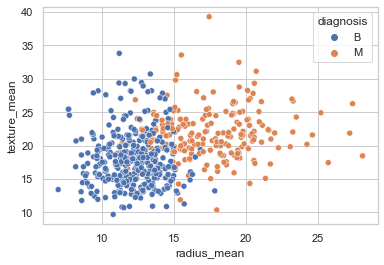

In [10]:
sns.set(style="whitegrid")
sns.scatterplot(data=df,x="radius_mean",y="texture_mean",hue="diagnosis")

<AxesSubplot:xlabel='fractal_dimension_mean', ylabel='radius_mean'>

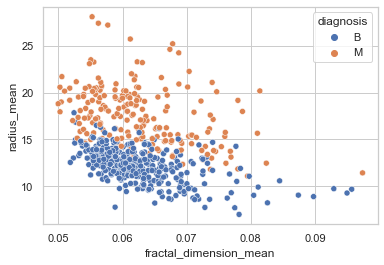

In [11]:
sns.scatterplot(data=df,x="fractal_dimension_mean",y="radius_mean",hue="diagnosis")

In [12]:
columns = list(df.columns)

In [13]:
columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

<AxesSubplot:xlabel='radius_mean', ylabel='concavity_mean'>

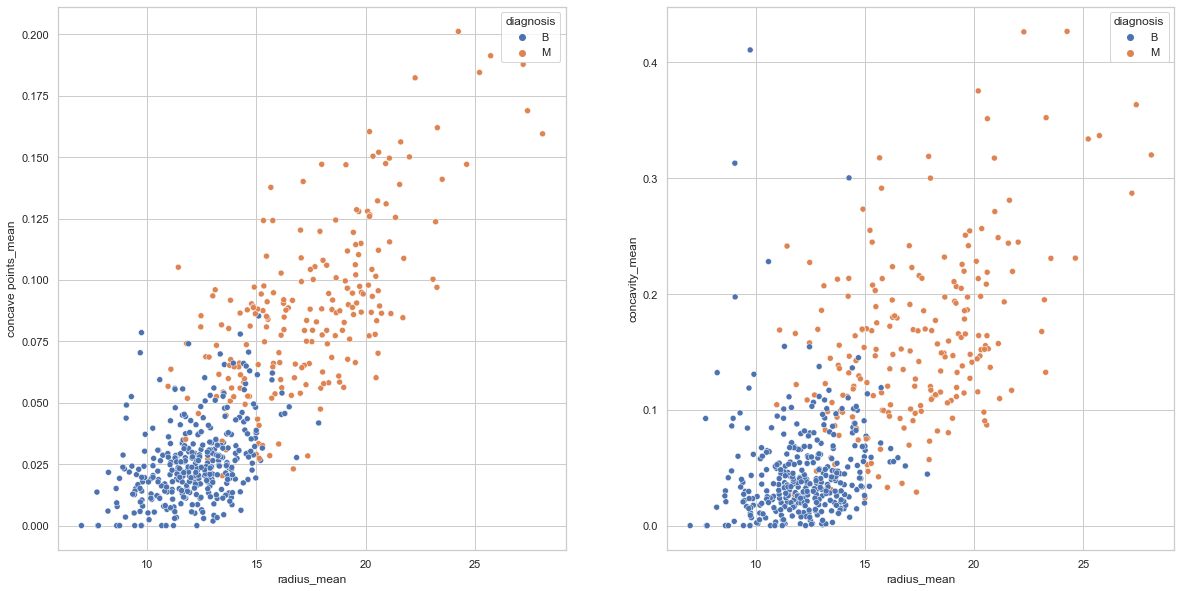

In [14]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data=df,x='radius_mean',y='concave points_mean',hue="diagnosis",ax=ax1)
sns.scatterplot(data=df,x='radius_mean',y='concavity_mean',hue="diagnosis",ax=ax2)


In [15]:
# radius mean: texture mean, smoothness mean, concavity_mean, *concave points mean

In [16]:
X = df.drop("diagnosis",axis=1)
Y = df["diagnosis"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = knn.predict(X_test)

In [23]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# Find best K
k_values = [i for i in range(1,50,2)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train,y_train,cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Cross validation Score')

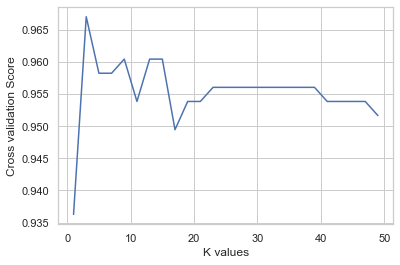

In [26]:
sns.lineplot(x=k_values,y=scores,markers='o')
plt.xlabel("K values")
plt.ylabel("Cross validation Score")

In [27]:
best_k = k_values[scores.index(max(scores))]

In [28]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
# recall = metrics.recall_score(y_test,y_pred)
# precision = metrics.precision_score(y_test,y_pred)
print("Accuracy:", accuracy)
# print("Recall:",recall)
# print("Precision:",precision)

Accuracy: 0.9649122807017544


In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

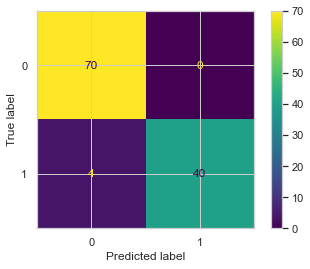

In [32]:
cm_display.plot()

In [33]:
nX = df[["radius_mean","concave points_mean"]]
nY = df["diagnosis"]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(nX,nY,test_size=0.2)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
k_values = [i for i in range(1,50,2)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train,y_train,cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Cross validation Score')

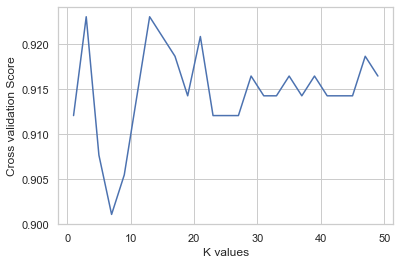

In [37]:
sns.lineplot(x=k_values,y=scores,markers='o')
plt.xlabel("K values")
plt.ylabel("Cross validation Score")

In [38]:
best_k = k_values[scores.index(max(scores))]

In [39]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


In [40]:
sc_x = (scaler.fit_transform(df['radius_mean'].values.reshape(-1,1)))
sc_y = scaler.fit_transform(df['concave points_mean'].values.reshape(-1,1))
xmin = np.min(sc_x)
xmax = np.max(sc_x)
ymin = np.min(sc_y)
ymax = np.max(sc_y)
h=0.01
print(xmin,xmax,ymin,ymax)
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
xx_row = xx.ravel()
yy_row = yy.ravel()



-2.0296483039857525 3.9712876465451097 -1.2618195840825894 3.9279296603616616


In [50]:
zz_row=knn.predict(np.c_[xx_row,yy_row])

c:\Users\TEST\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


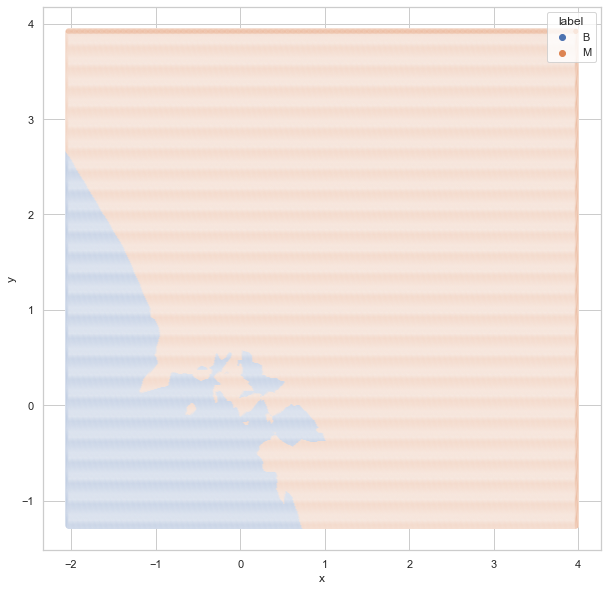

In [51]:
tmp_df=pd.DataFrame(np.c_[xx_row,yy_row,zz_row],columns=['x','y','label'])
plt.figure(figsize=[10,10])
sns.scatterplot(data=tmp_df,x='x',y='y',hue='label')
plt.show()
plt.close()                    